# **Linear Regression**

Dataset - Diamond Price Detection


a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


(53940, 9)


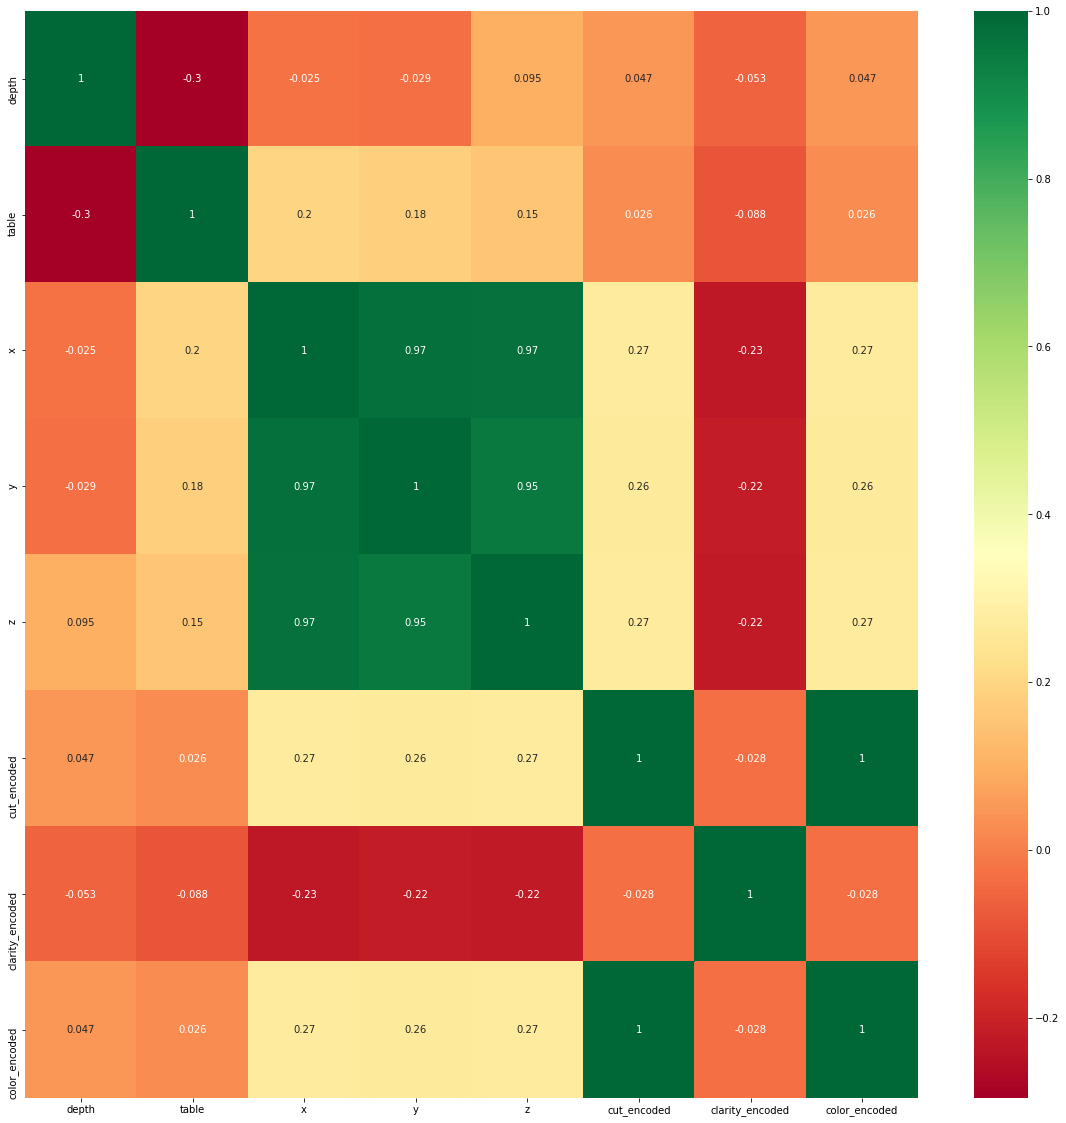

In [102]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder  #for label encoding
from sklearn import preprocessing #for normalisation
from sklearn.model_selection import train_test_split # to split data into training sets and test sets
import warnings
from random import seed
from random import randint
from sklearn.metrics import mean_squared_error
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?', header=None,  names = headers) 
data = data.reset_index(drop=True)
df = data.iloc[1:]
#print("**************")

##doing label encoding
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['cut_encoded'] = labelencoder.fit_transform(df['cut'])
df['clarity_encoded'] = labelencoder.fit_transform(df['clarity'])
df['color_encoded'] = labelencoder.fit_transform(df['color'])
#print(df)
df=df.drop(['cut', 'clarity','color'], axis = 1) 


## doing NORMALISATION on every column except price for range 0-1 (that's why *1)
df["color_encoded"]=((df["color_encoded"]-df["color_encoded"].min())/(df["color_encoded"].max()-df["color_encoded"].min()))*1
df["clarity_encoded"]=((df["clarity_encoded"]-df["clarity_encoded"].min())/(df["clarity_encoded"].max()-df["clarity_encoded"].min()))*1
df["cut_encoded"]=((df["color_encoded"]-df["color_encoded"].min())/(df["color_encoded"].max()-df["color_encoded"].min()))*1


df['depth'] = pd.to_numeric(df['depth']) 
df["depth"]=((df["depth"]-df["depth"].min())/(df["depth"].max()-df["depth"].min()))*1

df['table'] = pd.to_numeric(df['table']) 
df["table"]=((df["table"]-df["table"].min())/(df["table"].max()-df["table"].min()))*1

df['x'] = pd.to_numeric(df['x']) 
df["x"]=((df["x"]-df["x"].min())/(df["x"].max()-df["x"].min()))*1

df['y'] = pd.to_numeric(df['y']) 
df["y"]=((df["y"]-df["y"].min())/(df["y"].max()-df["y"].min()))*1

df['z'] = pd.to_numeric(df['z']) 
df["z"]=((df["z"]-df["z"].min())/(df["z"].max()-df["z"].min()))*1

#print(df.sample(5))

y=df['price']

corrmat=df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
df=df.drop(['price'], axis = 1) 

print(df.shape)


In [103]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=32)
x_train=np.array(x_train).astype(np.float)
x_test=np.array(x_test).astype(np.float)
y_train=np.array(y_train).astype(np.float)
y_test=np.array(y_test).astype(np.float)


ones=np.ones(shape=x_train.shape[0]).reshape(-1,1)
x_train=np.concatenate((ones,x_train),1)

ones=np.ones(shape=x_test.shape[0]).reshape(-1,1)
x_test=np.concatenate((ones,x_test),1)

y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
# seed random number generator
seed(1)
#print(type(x_train))
length=len(x_train)
w=np.zeros(10)

#print(w)

w=w.reshape(-1,1)

#print(x_train.shape)
diff=[]
epoch=10000

alpha=0.01
for i in range(epoch):
  y_predict=np.dot(x_train,w)
  cost=np.subtract(y_predict,y_train)
  diff.append(cost)
  t=[]
  t=np.dot(x_train.T,cost)
  t1=t*(alpha/len(y_train))
  w=w-t1
#print(w)

pred=[]
for i in range(len(x_test)):
  hypo=np.dot(x_test[i],w)
  pred.append(hypo)

#print(pred)
#print(y_test)
plot2=pred[:15]
plot3=y_test[:15]
from sklearn.metrics import r2_score
def MSE(actual,predicted): # one is y_pred, one is y_test
  sum_error = 0.0
  for i in range(len(actual)):
    sum_error += (predicted[i] - actual[i])**2
  return sum_error/ float(len(actual))

def Mean_Absolute_Error(actual, predicted):
  predicted=predicted.astype(float)
  sum_error = 0.0
  for i in range(len(actual)):
    sum_error += abs(predicted[i] - actual[i])
  return sum_error/ float(len(actual))



In [104]:
print("Mean Absolute Error  ","  Mean Squared Error  ","  R2 score")
print("---------------------------------------------------------------")
print(Mean_Absolute_Error(np.array(pred),y_test)[0],end="    ")
print((MSE(np.array(pred),y_test))[0],end="    ")
print(r2_score(y_test,np.array(pred)))

Mean Absolute Error     Mean Squared Error     R2 score
---------------------------------------------------------------
937.1035418578986    1942165.6522998996    0.8789413737325537


b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

I generated a map from the above code.
From that, we can conclude: 
1. The feature "depth" is the least co-realted with price.
2. The features "x" , "y" , "z" are highly co-related.

c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [105]:
# import sklearn model
from sklearn.linear_model import LinearRegression

rl=LinearRegression().fit(x_train, y_train)
y_pred=rl.predict(x_test)


print("Mean Absolute Error  ","  Mean Squared Error  ","  R2 score")
print("---------------------------------------------------------------")
print(Mean_Absolute_Error(np.array(y_pred),y_test)[0],end="    ")
print(MSE(np.array(y_pred),y_test)[0],end="    ")
print(r2_score(np.array(y_pred),y_test))

Mean Absolute Error     Mean Squared Error     R2 score
---------------------------------------------------------------
859.415886570846    1834473.1118024827    0.8716993553644932


d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


In [106]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder  #for label encoding
from sklearn import preprocessing #for normalisation
from sklearn.model_selection import train_test_split # to split data into training sets and test sets
import warnings
from random import seed
from random import randint
from sklearn.metrics import mean_squared_error
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?', header=None,  names = headers) 
data = data.reset_index(drop=True)
df = data.iloc[1:]
#print("**************")

##doing label encoding
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['cut_encoded'] = labelencoder.fit_transform(df['cut'])
df['clarity_encoded'] = labelencoder.fit_transform(df['clarity'])
df['color_encoded'] = labelencoder.fit_transform(df['color'])
#print(df)
df=df.drop(['cut', 'clarity','color'], axis = 1) 


## doing NORMALISATION on every column except price for range 0-1 (that's why *1)
df["color_encoded"]=((df["color_encoded"]-df["color_encoded"].min())/(df["color_encoded"].max()-df["color_encoded"].min()))*1
df["clarity_encoded"]=((df["clarity_encoded"]-df["clarity_encoded"].min())/(df["clarity_encoded"].max()-df["clarity_encoded"].min()))*1
df["cut_encoded"]=((df["color_encoded"]-df["color_encoded"].min())/(df["color_encoded"].max()-df["color_encoded"].min()))*1


df['depth'] = pd.to_numeric(df['depth']) 
df["depth"]=((df["depth"]-df["depth"].min())/(df["depth"].max()-df["depth"].min()))*1

df['table'] = pd.to_numeric(df['table']) 
df["table"]=((df["table"]-df["table"].min())/(df["table"].max()-df["table"].min()))*1

df['x'] = pd.to_numeric(df['x']) 
df["x"]=((df["x"]-df["x"].min())/(df["x"].max()-df["x"].min()))*1

df['y'] = pd.to_numeric(df['y']) 
df["y"]=((df["y"]-df["y"].min())/(df["y"].max()-df["y"].min()))*1

df['z'] = pd.to_numeric(df['z']) 
df["z"]=((df["z"]-df["z"].min())/(df["z"].max()-df["z"].min()))*1

#print(df.sample(5))

y=df['price']
df=df.drop(['price'], axis = 1) 
#print(df.shape)

X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size=0.2, random_state=42)
X_train=X_train.to_numpy()
Y_train=Y_train.to_numpy()
X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy().astype(float)

df=np.array(df)

#from sklearn.linear_model import LinearRegression
rl=LinearRegression().fit(X_train, Y_train)
Y_pred=rl.predict(X_test)
#Y_pred=Y_pred.to_numpy()
#print(Y_pred[:10])
#print(Y_test[:10])

print("Mean Absolute Error  ","  Mean Squared Error  ","  R2 score")
print("---------------------------------------------------------------")
print(Mean_Absolute_Error(Y_pred,Y_test),end="    ")
print(MSE(np.array(Y_pred),Y_test),end="    ")
print(r2_score(np.array(Y_pred),Y_test))

Mean Absolute Error     Mean Squared Error     R2 score
---------------------------------------------------------------
857.8762432432592    1830222.0434829586    0.8718467111379056


The changes I have observed compared to before: Slight decrease in Mean Absolute Error and minute difference in R2 error.

e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


If feature selection is not done, our model might get overfitted and the results on diversed and real world data would be worse but in this case the data split on random state 42 might not be diversed.

f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


Text(0, 0.5, 'Price')

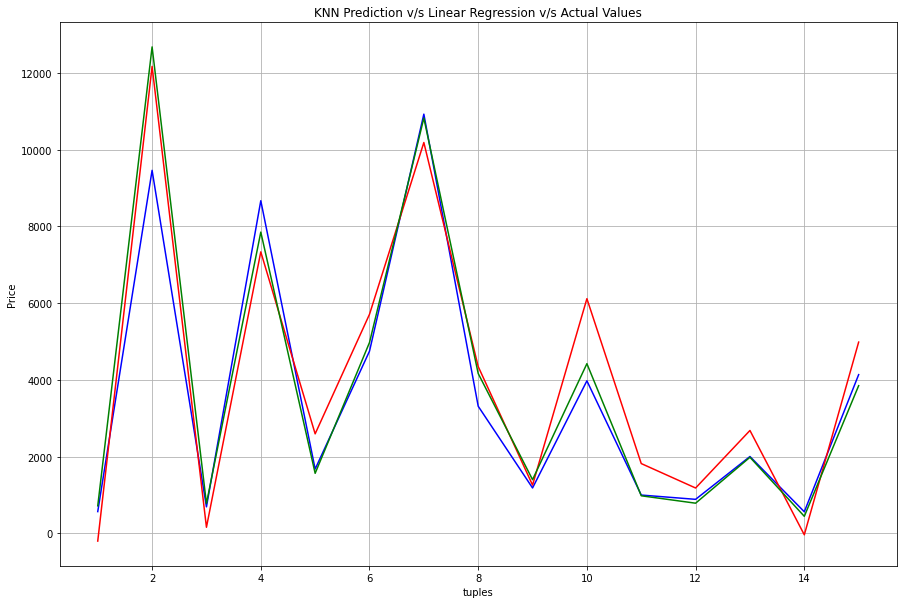

In [119]:
#plot
#15 values stored in list
#KNN regression: plot1, Linear Regression : plot2 , Actual Diamond Price. :plot3


#print(plot2)

#print(type(plot2))
#print(plot3)
plot4=[]
for abc in plot3:
  for ef in abc:
    plot4.append(ef)

plot5=[]
for abc in plot2:
  for ef in abc:
    plot5.append(ef)

plot1=np.array(plot1).reshape(-1,1)
plot4=np.array(plot4).reshape(-1,1)
plot5=np.array(plot5).reshape(-1,1)
#print(plot1)
#print(plot5)
#print(plot4)
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
x=np.array(x).reshape(-1,1)
plt.plot(x, plot1, color ='blue')
plt.plot(x, plot5, color ='red')
plt.plot(x, plot4, color ='green')

plt.rcParams["figure.figsize"] = (15,10)
plt.grid()
plt.title("KNN Prediction v/s Linear Regression v/s Actual Values")
plt.xlabel("tuples")
plt.ylabel("Price")